In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
input = 'pro-byoon-01.wav'
output = 'pro-byoon-01_resample.wav'
origin_sr = 16000
resample_sr = 8000

In [3]:
y, sr = librosa.load(input, sr=origin_sr)
resample = librosa.resample(y, sr, resample_sr)
print("original wav sr: {}, original wav shape: {}, resample wav sr: {}, resmaple shape: {}" \
      .format(origin_sr, y.shape, resample_sr, resample.shape))

original wav sr: 16000, original wav shape: (452920,), resample wav sr: 8000, resmaple shape: (226460,)


In [4]:
librosa.output.write_wav(output, resample, resample_sr)

In [5]:
from IPython.display import Audio, display
Audio(y, rate=sr)

In [6]:
from IPython.display import Audio, display
Audio(output, rate=resample_sr)

Text(0, 0.5, 'amplitude')

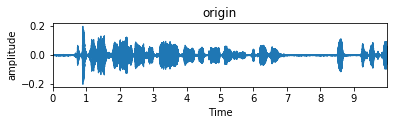

In [40]:
y1, sr = librosa.load(input, duration=10)
plt.figure()
plt.subplot(3, 1, 1)
librosa.display.waveplot(y1, sr=sr)
plt.title('origin')
plt.ylabel('amplitude')

Text(0, 0.5, 'amplitude')

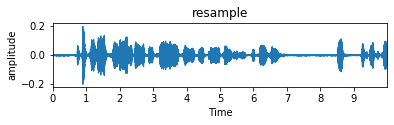

In [41]:
y2, sr = librosa.load(output, duration=10)
plt.figure()
plt.subplot(3, 1, 1)
librosa.display.waveplot(y2, sr=sr)
plt.title('resample')
plt.ylabel('amplitude')

In [44]:
import numpy as np
from scipy.fftpack import fft
from scipy import signal

[0.00224606 0.003478   0.00305316 ... 0.00066436 0.00077799 0.        ] 22050


Text(0.5, 0, 'Second')

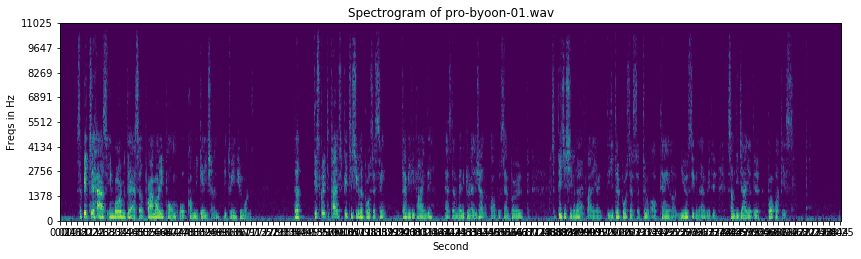

In [64]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html

samples, sample_rate = librosa.load(input)
print(samples,sample_rate)

def log_specgram(audio, sample_rate, window_size=20, step_size=10, eps=1e-10):
    freqs, times, spec = signal.spectrogram(audio,
                                            fs= sample_rate,
                                            window='hann',
                                            detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32)+eps)

fig = plt.figure(figsize = (14,8))
ax2 = fig.add_subplot(212)
ax2.imshow(spectogram.T, aspect='auto', origin='lower',
          extent = [times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::20])
ax2.set_title('Spectrogram of '+input)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Second')

[0.00193796 0.00278433 0.00330465 ... 0.00067472 0.00040098 0.        ] 22050


Text(0.5, 0, 'Second')

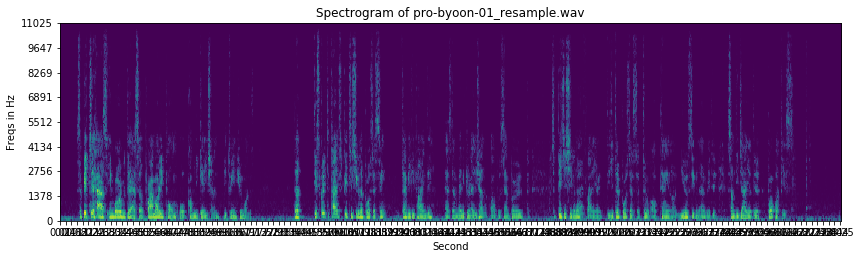

In [65]:
samples, sample_rate = librosa.load(output)
print(samples,sample_rate)

fig = plt.figure(figsize = (14,8))
ax2 = fig.add_subplot(212)
ax2.imshow(spectogram.T, aspect='auto', origin='lower',
          extent = [times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::20])
ax2.set_title('Spectrogram of '+output)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Second')